In [23]:
import matplotlib.pyplot as plt
import numpy as np
import load_data

In [24]:
# Load training data
X_train = load_data.load_images("MNIST_dataset/train-images-idx3-ubyte/train-images-idx3-ubyte")
y_train = load_data.load_labels("MNIST_dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte")

# Load test data
X_test = load_data.load_images("MNIST_dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")
y_test = load_data.load_labels("MNIST_dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


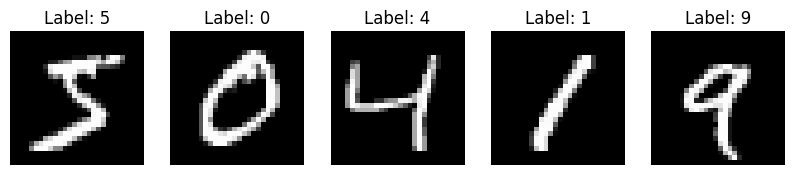

In [25]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

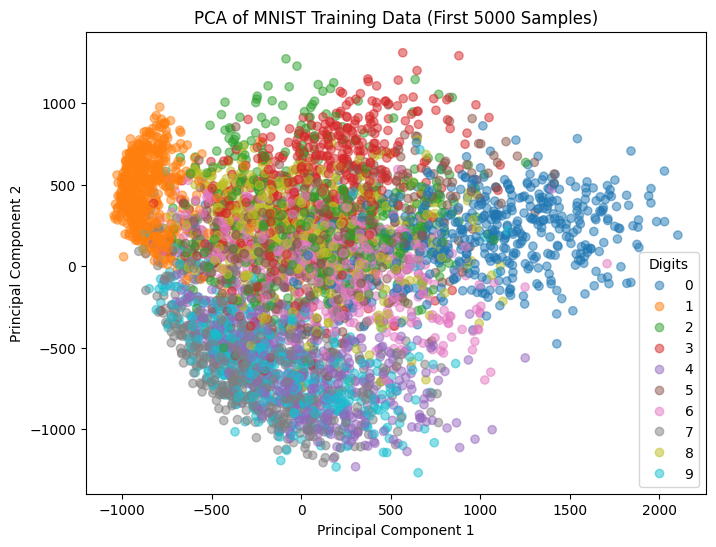

In [27]:
from sklearn.decomposition import PCA
# Flatten the images for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

#only visualize the first 5000 samples for better clarity
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:5000, 0], X_train_pca[:5000, 1], c=y_train[:5000], cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA of MNIST Training Data (First 5000 Samples)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

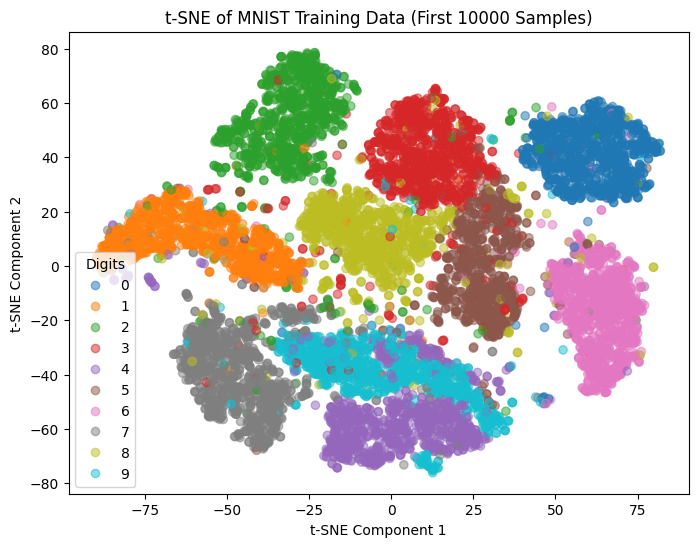

In [ ]:
#t-SNE visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_flat[:10000])  # Only visualize the first 10000 samples for better clarity
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:10000], cmap='tab10', alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE of MNIST Training Data (First 10000 Samples)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()